In [7]:
from keras import datasets
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import pandas as pd

In [8]:
# 类别标签
label_list = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [9]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)



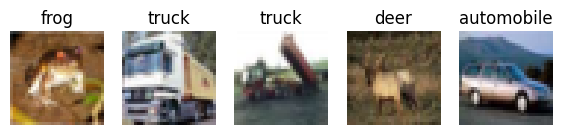

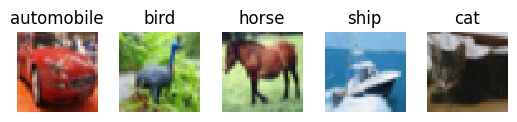

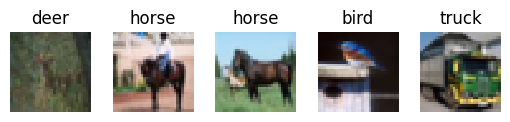

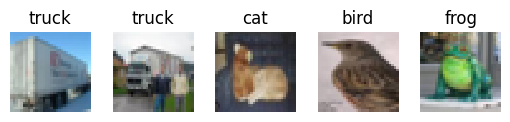

In [10]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_data[index], cmap="binary", interpolation="nearest")
            plt.axis("off")  # 把坐标系去掉
            plt.title(class_names[y_data[index][0]])  # 打印标题
        plt.show()

show_imgs(4, 5, x_train, y_train, label_list)

In [11]:
# 数据处理
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)

# score = cross_val_score(clf, X=x_train, y=y_train.ravel(), cv=5, scoring="accuracy", verbose=3)
# print("Current Score:", score)

In [13]:
# 最终评估
clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)
report = classification_report(y_test, y_pred, output_dict=True)
print(report)
df_report = pd.DataFrame(report).transpose()
df_report.to_csv('convention.csv')

{'0': {'precision': 0.5105315947843531, 'recall': 0.509, 'f1-score': 0.5097646469704556, 'support': 1000.0}, '1': {'precision': 0.48554913294797686, 'recall': 0.504, 'f1-score': 0.4946025515210991, 'support': 1000.0}, '2': {'precision': 0.34934497816593885, 'recall': 0.16, 'f1-score': 0.2194787379972565, 'support': 1000.0}, '3': {'precision': 0.352112676056338, 'recall': 0.175, 'f1-score': 0.23380093520374082, 'support': 1000.0}, '4': {'precision': 0.3280881195908733, 'recall': 0.417, 'f1-score': 0.36723910171730517, 'support': 1000.0}, '5': {'precision': 0.38598326359832635, 'recall': 0.369, 'f1-score': 0.3773006134969325, 'support': 1000.0}, '6': {'precision': 0.3888121546961326, 'recall': 0.563, 'f1-score': 0.4599673202614379, 'support': 1000.0}, '7': {'precision': 0.4591728525980912, 'recall': 0.433, 'f1-score': 0.44570252187339165, 'support': 1000.0}, '8': {'precision': 0.5261261261261261, 'recall': 0.584, 'f1-score': 0.5535545023696683, 'support': 1000.0}, '9': {'precision': 0.44